In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# Data Preprocessing

## Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/dataset-70-train-test-split/70-15-15-Data_Splited/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

## Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/dataset-70-train-test-split/70-15-15-Data_Splited/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Simple CNN Model Building 

In [ ]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [ ]:
# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# cnn.add(tf.keras.layers.Dropout(0.25))
# cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# cnn.add(tf.keras.layers.Dropout(0.25))
# cnn.add(tf.keras.layers.Flatten())
# cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
# cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
# cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting
# #Output Layer
# cnn.add(tf.keras.layers.Dense(units=16,activation='softmax'))

# Compiling and Training Phase

In [ ]:
# cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# cnn.summary()

In [ ]:
# training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

# Resnet 

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model with pretrained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use global average pooling
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(16, activation='softmax')(x)  # 16 classes

# Create the full model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=70)

## Evaluating Model

In [ ]:
# Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

In [ ]:
#Validation set Accuracy
# val_loss, val_acc = cnn.evaluate(validation_set)
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

## Saving Model

In [ ]:
# cnn.save('/kaggle/working/trained_model.h5')
model.save('/kaggle/working/trained_model_70.h5')

In [ ]:

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
training_history.history #Return Dictionary of history

In [ ]:
# {"accuracy": [0.06817051023244858, 0.08143971115350723, 0.12887708842754364, 0.22109802067279816, 0.32111459970474243, 0.42710232734680176, 0.5198208689689636, 0.6032509803771973, 0.6795488595962524, 0.7354453206062317, 0.7706087231636047, 0.8213633894920349, 0.8412672281265259, 0.8576878309249878, 0.861668586730957, 0.8855531811714172, 0.8741084933280945, 0.9195554852485657, 0.9188920259475708, 0.928678035736084, 0.9275169968605042, 0.9319953322410583, 0.9389616847038269, 0.9417814016342163, 0.9426107406616211, 0.943274199962616, 0.9515674114227295, 0.9517332911491394, 0.9392934441566467, 0.9449328184127808, 0.9490794539451599, 0.9658318161964417, 0.9659976959228516, 0.9701443314552307, 0.948581874370575, 0.9658318161964417, 0.9645048975944519, 0.9608558416366577, 0.9621827602386475, 0.9591972231864929, 0.968651533126831, 0.9679880738258362, 0.9706419110298157, 0.9716370701789856, 0.9683197736740112, 0.9746226668357849, 0.9751202464103699, 0.9736274480819702, 0.9653342366218567, 0.9731298685073853], "loss": [4.26617431640625, 2.758991003036499, 2.639012336730957, 2.2918782234191895, 1.9749903678894043, 1.685436725616455, 1.4429810047149658, 1.1811988353729248, 0.9680423736572266, 0.7981772422790527, 0.681694746017456, 0.5498112440109253, 0.49708908796310425, 0.42819005250930786, 0.43157246708869934, 0.34069404006004333, 0.39832109212875366, 0.25140759348869324, 0.2688172161579132, 0.23297882080078125, 0.2295934408903122, 0.21577036380767822, 0.19616276025772095, 0.20768554508686066, 0.17794391512870789, 0.19271282851696014, 0.18075722455978394, 0.17078819870948792, 0.22238360345363617, 0.1900717318058014, 0.17420849204063416, 0.11564774066209793, 0.12704907357692719, 0.10119025409221649, 0.19160056114196777, 0.11314982920885086, 0.1320296972990036, 0.1252644658088684, 0.12702055275440216, 0.14881309866905212, 0.13642677664756775, 0.11477383971214294, 0.10444661974906921, 0.10598798096179962, 0.12208989262580872, 0.0937228873372078, 0.09745081514120102, 0.11136257648468018, 0.1459234058856964, 0.09623367339372635], "val_accuracy": [0.08582574874162674, 0.07412223517894745, 0.19505852460861206, 0.2977893352508545, 0.36671000719070435, 0.4083224833011627, 0.47724318504333496, 0.5084525346755981, 0.5058517456054688, 0.5305591821670532, 0.5461638569831848, 0.5513654351234436, 0.5032509565353394, 0.5383614897727966, 0.5916774868965149, 0.5890766978263855, 0.5175552368164062, 0.5916774868965149, 0.6033810377120972, 0.5864759683609009, 0.5864759683609009, 0.5851755738258362, 0.5942782759666443, 0.5968790650367737, 0.6007802486419678, 0.5630689263343811, 0.5734720230102539, 0.5812743902206421, 0.5903770923614502, 0.577373206615448, 0.5552665591239929, 0.5942782759666443, 0.6085825562477112, 0.5942782759666443, 0.5747724175453186, 0.6163849234580994, 0.6332899928092957, 0.6215865015983582, 0.5630689263343811, 0.6033810377120972, 0.5682705044746399, 0.6176853179931641, 0.6176853179931641, 0.5851755738258362, 0.5578673481941223, 0.595578670501709, 0.6085825562477112, 0.5981794595718384, 0.5669701099395752, 0.61378413438797], "val_loss": [2.762371063232422, 2.769791603088379, 2.4011075496673584, 2.045260429382324, 1.8500233888626099, 1.7260905504226685, 1.564388632774353, 1.4580484628677368, 1.4463741779327393, 1.4642338752746582, 1.5561494827270508, 1.4996320009231567, 1.8473780155181885, 1.8166753053665161, 1.5656768083572388, 1.6409597396850586, 1.8155087232589722, 1.6982470750808716, 1.500344157218933, 1.6129652261734009, 1.9038759469985962, 1.7039788961410522, 1.7942086458206177, 1.8374052047729492, 1.7206164598464966, 1.9023542404174805, 1.8249386548995972, 1.8930832147598267, 1.7399086952209473, 1.9700076580047607, 2.0147078037261963, 1.921182632446289, 1.9090485572814941, 2.1531877517700195, 1.9672415256500244, 1.901789903640747, 1.7669460773468018, 1.7959158420562744, 2.261955499649048, 1.992547631263733, 2.1054770946502686, 2.012455940246582, 2.030130624771118, 2.074338674545288, 2.6440038681030273, 2.1284329891204834, 2.1919925212860107, 2.3833203315734863, 2.170811653137207, 1.9819272756576538]}

In [ ]:
# ## save the file to the kaggle wrking dir

# import shutil

# # Define the source and destination paths
# source_path = '/kaggle/input/models/training_hist.json'
# destination_path = '/kaggle/working/training_history.json'

# # Copy the file from source to destination
# shutil.copy(source_path, destination_path)

# print(f"File has been copied to {destination_path}")


## Loading the accuracy and losses from the json file

In [8]:
import json

# Define the path to the existing JSON file
input_path = '/kaggle/input/70-epochs-70-traindata/training_hist_70_epochs.json'

# Load the JSON content into training_history.history
with open(input_path, 'r') as f:
    training_history = json.load(f)

# Assuming you need the `training_history.history` key
training_history_object = {'history': training_history}

# Perform your tasks here
print("Loaded training history:", training_history_object['history'])

# Save back if modifications are required
output_path = '/kaggle/working/training_history_updated.json'

with open(output_path, 'w') as f:
    json.dump(training_history_object['history'], f)

print(f"Updated training history saved to {output_path}")

Loaded training history: {'accuracy': [0.1978771835565567, 0.4461713433265686, 0.5703184008598328, 0.6468915939331055, 0.7090598940849304, 0.7448824644088745, 0.7899923920631409, 0.8125473856925964, 0.8242987394332886, 0.8555724024772644, 0.8669446706771851, 0.8792645931243896, 0.8927217721939087, 0.9114859700202942, 0.9120545983314514, 0.914708137512207, 0.9325246214866638, 0.9361258745193481, 0.943517804145813, 0.9539423584938049, 0.9520469903945923, 0.9573540687561035, 0.9547005295753479, 0.9581121802330017, 0.9611448049545288, 0.9687263369560242, 0.9715693593025208, 0.9732751846313477, 0.9727066159248352, 0.9732751846313477, 0.9751706123352051, 0.9759287238121033, 0.9763078093528748, 0.9802880883216858, 0.9838892817497253, 0.9778240919113159, 0.9806671738624573, 0.9793404340744019, 0.9827520847320557, 0.9835102558135986, 0.9873009920120239, 0.984836995601654, 0.9812358021736145, 0.9886277318000793, 0.9852160811424255, 0.9869219064712524, 0.9901440739631653, 0.9882486462593079, 0.98

In [9]:
# print(training_history.history.keys())
print(training_history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Calculating Accuracy of Model Achieved on Validation set

In [10]:
# print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))
print("Validation set Accuracy: {} %".format(training_history['val_accuracy'][-1]*100))

Validation set Accuracy: 94.76439952850342 %


# Accuracy Visualization

## Training Visualization

In [11]:
# training_history.history['accuracy']
training_history['accuracy']

[0.1978771835565567,
 0.4461713433265686,
 0.5703184008598328,
 0.6468915939331055,
 0.7090598940849304,
 0.7448824644088745,
 0.7899923920631409,
 0.8125473856925964,
 0.8242987394332886,
 0.8555724024772644,
 0.8669446706771851,
 0.8792645931243896,
 0.8927217721939087,
 0.9114859700202942,
 0.9120545983314514,
 0.914708137512207,
 0.9325246214866638,
 0.9361258745193481,
 0.943517804145813,
 0.9539423584938049,
 0.9520469903945923,
 0.9573540687561035,
 0.9547005295753479,
 0.9581121802330017,
 0.9611448049545288,
 0.9687263369560242,
 0.9715693593025208,
 0.9732751846313477,
 0.9727066159248352,
 0.9732751846313477,
 0.9751706123352051,
 0.9759287238121033,
 0.9763078093528748,
 0.9802880883216858,
 0.9838892817497253,
 0.9778240919113159,
 0.9806671738624573,
 0.9793404340744019,
 0.9827520847320557,
 0.9835102558135986,
 0.9873009920120239,
 0.984836995601654,
 0.9812358021736145,
 0.9886277318000793,
 0.9852160811424255,
 0.9869219064712524,
 0.9901440739631653,
 0.9882486462593

# Training and validation accuracy

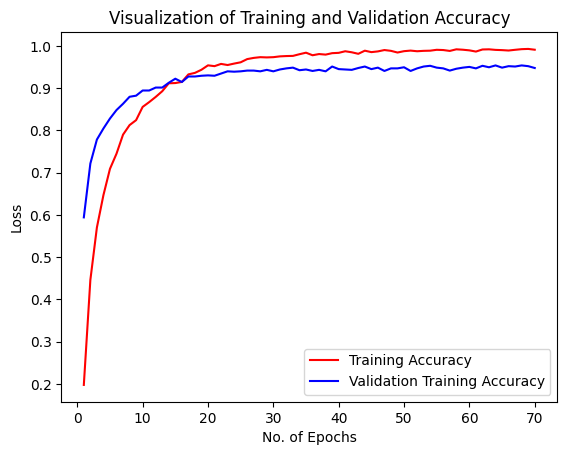

In [13]:
epochs = [i for i in range(1,71)]

# Plot the training and validation losses
# plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
# plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Training Accuracy')
plt.plot(epochs, training_history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history['val_accuracy'], color='blue', label='Validation Training Accuracy')

# Add labels, title, and legend
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Visualization of Training and Validation Accuracy')
plt.legend(loc='lower right')  # Position the legend in the upper right
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# epochs = [i for i in range(1,51)]
# # plt.plot(epochs,training_history.history['accuracy'],color='red')
# plt.plot(epochs,training_history.history['accuracy'],color='red')
# plt.xlabel('No. of Epochs')
# plt.ylabel('Traiining Accuracy')
# plt.title('Visualization of Training Accuracy Result')
# plt.show()

## Validation Accuracy

In [ ]:
# # plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
# plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
# plt.xlabel('No. of Epochs')
# plt.ylabel('Validation Accuracy')
# plt.title('Visualization of Validation Accuracy Result')
# plt.show()

# Training and Validation losses

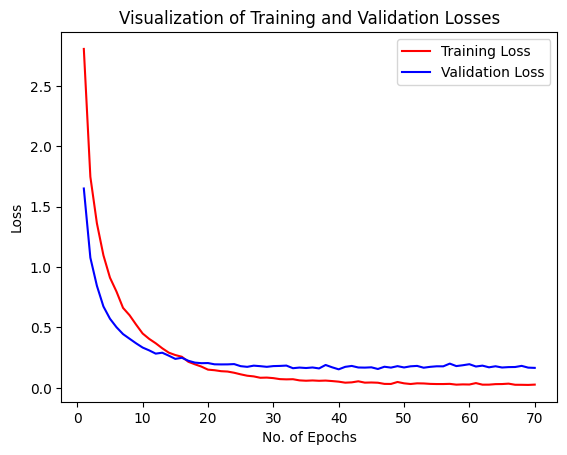

In [14]:
# Plot the training and validation losses
# plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
# plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')


plt.plot(epochs, training_history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history['val_loss'], color='blue', label='Validation Loss')
# Add labels, title, and legend
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Visualization of Training and Validation Losses')
plt.legend(loc='upper right')  # Position the legend in the upper right
plt.show()


## Test set Evaluation

In [15]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/dataset-70-train-test-split/70-15-15-Data_Splited/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1123 files belonging to 16 classes.


In [20]:
test_loss,test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

71/71 ━━━━━━━━━━━━━━━━━━━━ 32s 375ms/step - accuracy: 0.9369 - loss: 0.2548
Test accuracy: 0.9403383731842041


# Testing the model

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# test_set = tf.keras.utils.image_dataset_from_directory(
#     '/kaggle/input/train-test-valid-dataset-split/test',
#     labels="inferred",
#     label_mode="categorical",
#     class_names=None,
#     color_mode="rgb",
#     batch_size=,
#     image_size=(64, 64),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
#     crop_to_aspect_ratio=False
# )

In [19]:
# cnn = tf.keras.models.load_model('/kaggle/working/trained_model.h5')

# cnn = tf.keras.models.load_model('/kaggle/working/trained_model_75.h5')
model = tf.keras.models.load_model('/kaggle/input/70-epochs-70-traindata/trained_model_70.h5')
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,772,242 (94.50 MB)

 Trainable params: 1,184,528 (4.52 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

# Visualising and Performing Prediction on Single image

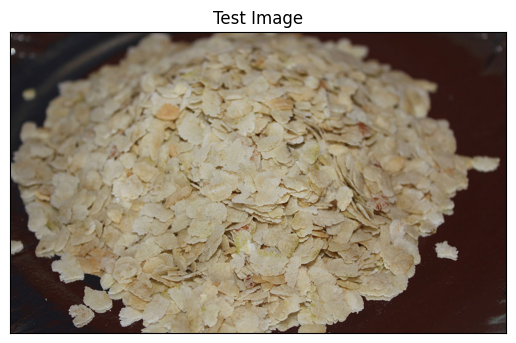

In [21]:
#Test Image Visualization
import cv2
image_path = '/kaggle/input/testing-images/testing images/chiura-1.jpg'
# image_path = '/kaggle/input/testing-images/testing images/bhutan.jpg'
# image_path = "/kaggle/input/train-test-split-dataset/Dhau/test/aug_198.jpg"
# image_path = "/kaggle/input/testing-images/testing images/dhau.jpg" # dhau
# image_path = "/kaggle/input/train-test-split-dataset/Bara/test/aug_192.jpg" # bara
# image_path = "/kaggle/input/train-test-split-dataset/Bhutan/test/aug_289.jpg"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# model testing

In [22]:
import numpy as np

image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [23]:
print(predictions)

[[1.00000000e+00 1.35469875e-08 1.23048108e-11 1.17459142e-09
  8.97334373e-10 1.78066262e-09 1.57332092e-10 2.88493594e-13
  5.87923399e-09 9.56649090e-15 2.89610154e-12 2.23807474e-12
  1.92354004e-15 1.77476943e-13 1.61269124e-13 3.38347774e-12]]


In [24]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


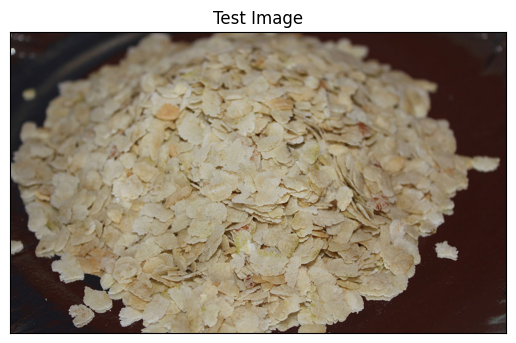

In [25]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [26]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a Baji


In [27]:
test_set.class_names

['Baji',
 'Bara',
 'Bhutan',
 'Bhuti',
 'Buffalo Masu(Dakulaa)',
 'Channa',
 'Dhau',
 'Kachilaa',
 'Lain tarkari',
 'Lainachar',
 'Saag',
 'Thoo',
 'aloo',
 'egg',
 'sapumicha',
 'yomari']

# Get true labels and predictions for confusion matrix

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
true_labels = []
predictions = []

# Unbatch the test dataset to process all samples
for images, labels in test_set.unbatch():
    # True labels
    true_labels.append(np.argmax(labels.numpy()))  # Convert one-hot to integer labels
    # Model predictions
    pred = np.argmax(model.predict(np.expand_dims(images.numpy(), axis=0)))  # Predict class
    predictions.append(pred)

true_labels = np.array(true_labels)
predictions = np.array(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

# Compute Confusion Matrix

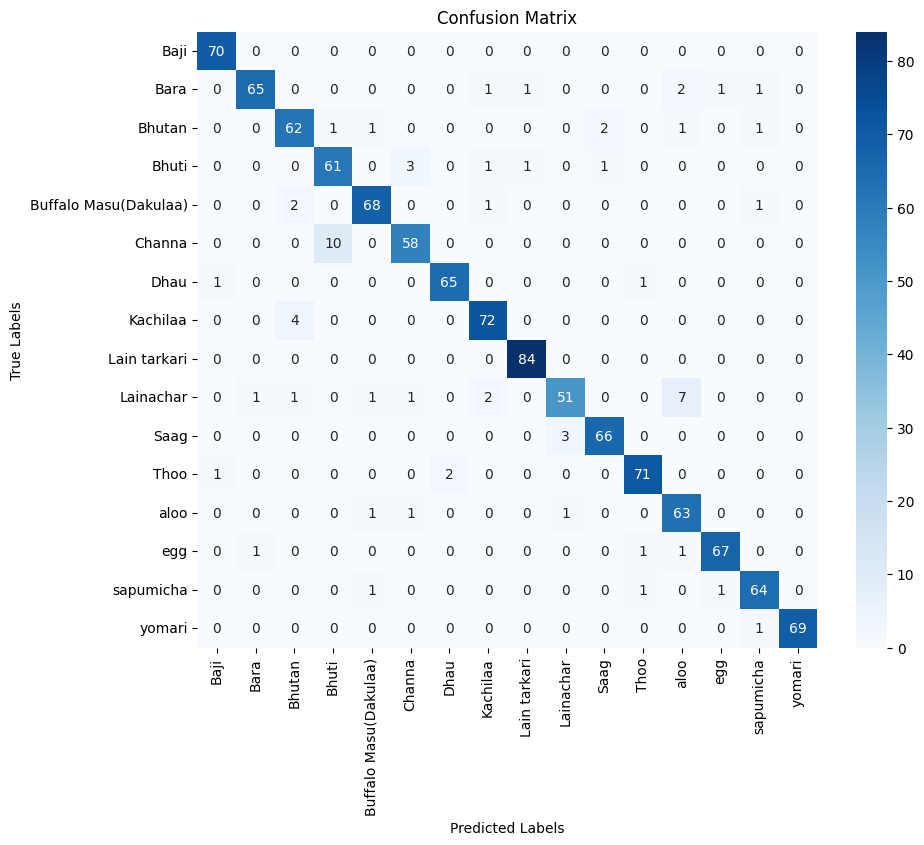

In [30]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_names, yticklabels=test_set.class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Class-wise Accuracy and F1-Scores:

# Understanding the Confusion Matrix:

### Structure:

The matrix is square, with rows representing the True Labels (actual classes) and columns representing the Predicted Labels (model's outputs).
The diagonal elements (top-left to bottom-right) show the number of instances correctly classified for each class.
Off-diagonal elements indicate misclassifications. For example, a value at row "Bara" and column "Bhutan" indicates how many "Bara" instances were misclassified as "Bhutan."
Key Observations:

### Class-Specific Accuracy:
The numbers along the diagonal are highest compared to other positions in their respective rows, which shows that the model performs well for most classes.


### Misclassifications:
Misclassification is reflected in non-zero values in off-diagonal elements. For example:
2 instances of "Bhuti" were classified as "Buffalo Masu(Dakulaa)."
7 instances of "Channa" were classified as "Bhutan."
Class Performance:
Classes like "Lain tarkari" (52 correct predictions) and "Yomari" (44 correct predictions) show very high accuracy.
"Lainachar" has notable confusion with "Kachilaa" (10 misclassifications).
Additional Metrics (Implied):

* True Positives (TP): Values along the diagonal (correct predictions).
* False Negatives (FN): The sum of each row minus the diagonal element (misclassified as other classes).
* False Positives (FP): The sum of each column minus the diagonal element (other classes misclassified as this class).


### Heatmap Color Intensity:

The darker the color, the higher the count of predictions in that cell. The diagonal has the darkest shades, reflecting good classification performance.
Example of a Row Interpretation:
"Bhutan" row:
True Labels: 34 actual instances of "Bhutan."
Correctly Predicted: 34 (diagonal element).


* Misclassified as:
      2 as "Buffalo Masu(Dakulaa).
  
      2 as "Channa.
  
      3 as "Yomari.

 


### Overall Model Insights:
The model performs well for most classes, with good diagonal dominance.
There are minor areas of confusion, possibly due to:
Similarity between certain categories (e.g., visually or contextually similar dishes like "Channa" and "Bhutan").
Imbalanced training data or insufficient examples for specific classes.
Suggestions for Improvement:
Analyze misclassified instances (off-diagonal values) to understand patterns or similarities between classes.

In [31]:
from sklearn.metrics import classification_report


# Generate classification report
report = classification_report(true_labels, predictions, target_names=test_set.class_names, output_dict=True)

# Print the overall classification report
print("Classification Report:\n")
print(classification_report(true_labels, predictions, target_names=test_set.class_names))


Classification Report:

                       precision    recall  f1-score   support

                 Baji       0.97      1.00      0.99        70
                 Bara       0.97      0.92      0.94        71
               Bhutan       0.90      0.91      0.91        68
                Bhuti       0.85      0.91      0.88        67
Buffalo Masu(Dakulaa)       0.94      0.94      0.94        72
               Channa       0.92      0.85      0.89        68
                 Dhau       0.97      0.97      0.97        67
             Kachilaa       0.94      0.95      0.94        76
         Lain tarkari       0.98      1.00      0.99        84
            Lainachar       0.93      0.80      0.86        64
                 Saag       0.96      0.96      0.96        69
                 Thoo       0.96      0.96      0.96        74
                 aloo       0.85      0.95      0.90        66
                  egg       0.97      0.96      0.96        70
            sapumicha       0.

### Precision

Out of all the instances the model predicted as positive, how many were actually positive?" 
High precision means the model is good at not making false positive predictions.

* Positive prediction bata actual accuracy. ( aru predictions lai esma include gardaina) formula : true positive / (tp +fp)

### Recall

Out of all the actual positive instances, how many did the model correctly identify?
High recall means the model captures most of the relevant positive cases. 


* TP/ (TP + FN)

### F1 Score : Harmonic mean  of precision and recall

(2 * (Precision * Recall) ) / (Precision + Recall) 

#  Extract and Sort Class-wise F1-Scores

In [32]:
# Extract class-wise F1-scores
class_f1_scores = {class_name: metrics["f1-score"] for class_name, metrics in report.items() if class_name in test_set.class_names}

# Create a DataFrame for better visualization
report_df = pd.DataFrame(class_f1_scores, index=['f1-score']).T
report_df = report_df.sort_values("f1-score", ascending=True)

# Display the sorted F1-scores
print("\nClass-wise F1-scores:")
print(report_df)



Class-wise F1-scores:
                       f1-score
Lainachar              0.857143
Bhuti                  0.877698
Channa                 0.885496
aloo                   0.900000
Bhutan                 0.905109
Kachilaa               0.941176
Bara                   0.942029
Buffalo Masu(Dakulaa)  0.944444
sapumicha              0.948148
Saag                   0.956522
Thoo                   0.959459
egg                    0.964029
Dhau                   0.970149
Baji                   0.985915
Lain tarkari           0.988235
yomari                 0.992806


#  Visualize F1-Scores

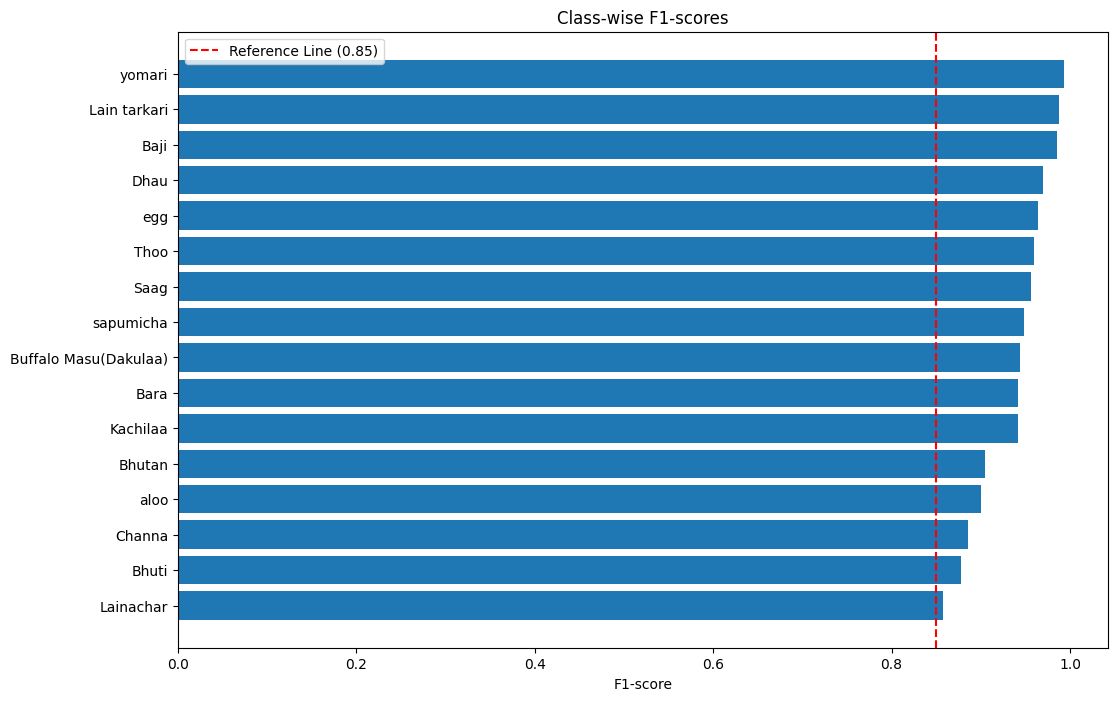

In [33]:
import matplotlib.pyplot as plt

# Plot class-wise F1-scores
fig, ax = plt.subplots(figsize=(12, 8))
scores = ax.barh(range(len(report_df)), report_df["f1-score"].values)
ax.set_yticks(range(len(report_df)))
ax.set_yticklabels(report_df.index)
ax.set_xlabel("F1-score")
ax.set_title("Class-wise F1-scores")
plt.axvline(x=0.85, linestyle='--', color='r', label="Reference Line (0.85)")
plt.legend()
plt.show()


## EXTRA

In [ ]:
# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt

# def load_and_prep_image(image_path, img_size=(64, 64), scale=True):
#     """
#     Load and preprocess an image.
#     Args:
#         image_path (str): Path to the image file.
#         img_size (tuple): Target size to resize the image (default: (64, 64)).
#         scale (bool): Whether to scale pixel values to [0, 1] (default: True).

#     Returns:
#         Preprocessed image ready for prediction.
#     """
#     img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
#     img = tf.keras.preprocessing.image.img_to_array(img)
#     if scale:
#         img = img / 255.0  # Normalize to [0, 1]
#     return img


In [ ]:
# import os

# def pred_plot_custom(folder_path, model, class_names):
#     """
#     Predict and plot results for custom images in a folder.

#     Args:
#         folder_path (str): Path to the folder containing custom images.
#         model (tf.keras.Model): Trained model for predictions.
#         class_names (list): List of class names corresponding to model output.
#     """
#     custom_food_images = [os.path.join(folder_path, img_path) for img_path in os.listdir(folder_path)]
#     fig, axes = plt.subplots(len(custom_food_images), 2, figsize=(15, 5 * len(custom_food_images)))

#     for i, img_path in enumerate(custom_food_images):
#         # Preprocess image
#         img = load_and_prep_image(img_path, img_size=(64, 64))  # Match model input size
#         img_batch = np.expand_dims(img, axis=0)  # Add batch dimension

#         # Make predictions
#         pred_prob = model.predict(img_batch)
#         pred_class = class_names[np.argmax(pred_prob)]

#         # Get top-5 predictions
#         top_5_idx = pred_prob[0].argsort()[-5:][::-1]
#         top_5_probs = pred_prob[0][top_5_idx]
#         top_5_labels = [class_names[idx] for idx in top_5_idx]

#         # Plot the image
#         axes[i][0].imshow(img / 255.0)  # Rescale for visualization
#         axes[i][0].set_title(f"Prediction: {pred_class} ({max(pred_prob[0]) * 100:.2f}%)")
#         axes[i][0].axis("off")

#         # Plot the top-5 predictions
#         axes[i][1].bar(top_5_labels, top_5_probs, color="orange")
#         axes[i][1].set_title("Top 5 Predictions")

#     plt.tight_layout()
#     plt.show()


In [ ]:
# # Folder containing custom images
# custom_images_folder = "/kaggle/input/testing-images/testing images"

# # Assuming `cnn` is your trained model and `test_set.class_names` contains the class names
# pred_plot_custom(custom_images_folder,model, test_set.class_names)
